In [2]:
import pandas as pd
import pandas_datareader.data as web
import datetime

# Define the start and end dates
start = datetime.datetime(1987, 5, 20)
end = datetime.datetime(2025, 3, 6)

# Fetch Brent oil prices data from FRED
df = web.DataReader('DCOILBRENTEU', 'fred', start, end)

# Inspect the data
print(df.head())
print(df.info())

# Save the data to a CSV file
df.to_csv('BrentOilPrices.csv')


            DCOILBRENTEU
DATE                    
1987-05-20         18.63
1987-05-21         18.45
1987-05-22         18.55
1987-05-25         18.60
1987-05-26         18.63
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9859 entries, 1987-05-20 to 2025-03-03
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DCOILBRENTEU  9589 non-null   float64
dtypes: float64(1)
memory usage: 154.0 KB
None


In [3]:
import pandas as pd

# Load the dataset without parsing dates
df = pd.read_csv('D:/week12 data/BrentOilPrices.csv')

# Inspect the first few rows and column names
print(df.head())
print(df.columns)

        Date  Price
0  5/20/1987  18.63
1  5/21/1987  18.45
2  5/22/1987  18.55
3  5/25/1987  18.60
4  5/26/1987  18.63
Index(['Date', 'Price'], dtype='object')


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/week12 data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)

# Handle missing values
df_cleaned = df.dropna()

# Inspect the cleaned data
print(df_cleaned.info())

# Save the cleaned data to a CSV file
df_cleaned.to_csv('Cleaned_BrentOilPrices.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 9589 entries, 0 to 9858
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9589 non-null   datetime64[ns]
 1   Price   9589 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 224.7 KB
None


C:\Users\Robel\AppData\Local\Temp\ipykernel_13632\947996345.py:4: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv('D:/week12 data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/week12 data/Cleaned_BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)

C:\Users\Robel\AppData\Local\Temp\ipykernel_13632\162262020.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv('D:/week12 data/Cleaned_BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


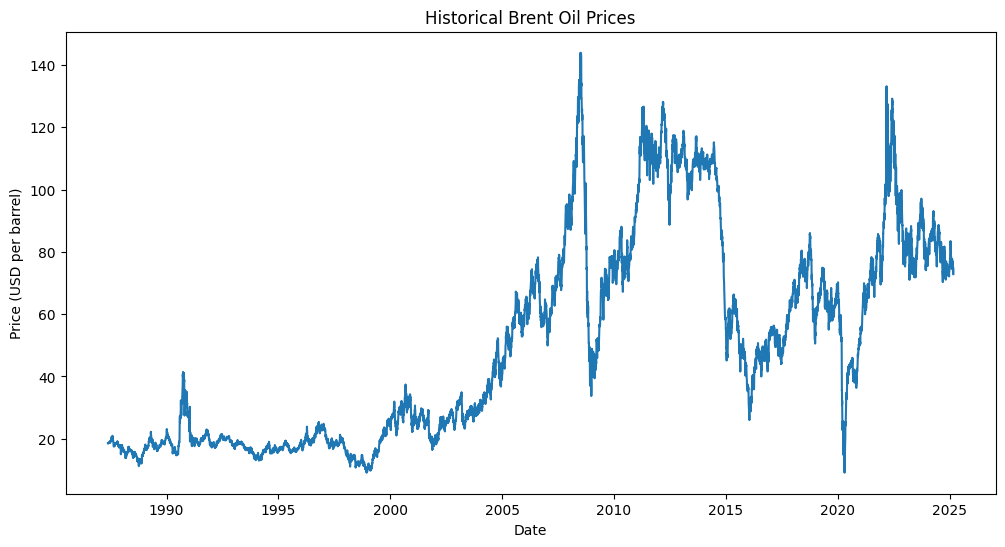

In [6]:
import matplotlib.pyplot as plt

# Plot the historical prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Historical Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.show()

In [7]:
import ruptures as rpt

# Convert the data to a format suitable for ruptures
prices = df['Price'].values

# Detect change points using the Binseg algorithm
algo_binseg = rpt.Binseg(model="rbf", min_size=3).fit(prices)
result_binseg = algo_binseg.predict(n_bkps=10)

# Ensure change points are within bounds
result_binseg = [cp for cp in result_binseg if cp < len(df)]

print("Detected Change Points:", result_binseg)

Detected Change Points: [3165, 4375, 5090, 5440, 5600, 5980, 6985, 7700, 8300, 8640]


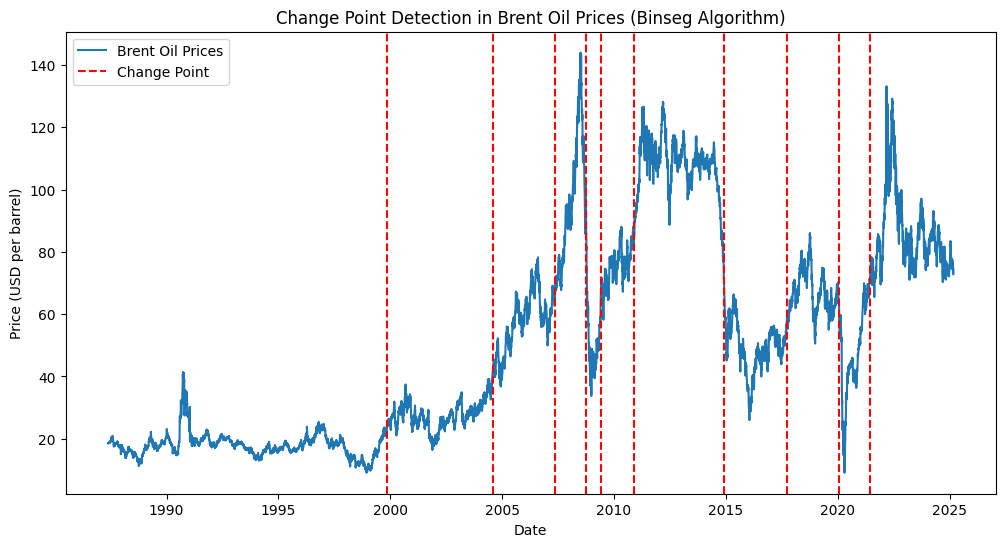

In [8]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], prices, label='Brent Oil Prices')
for cp in result_binseg:
    plt.axvline(df['Date'].iloc[cp], color='r', linestyle='--', label='Change Point' if cp == result_binseg[0] else "")
plt.title('Change Point Detection in Brent Oil Prices (Binseg Algorithm)')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

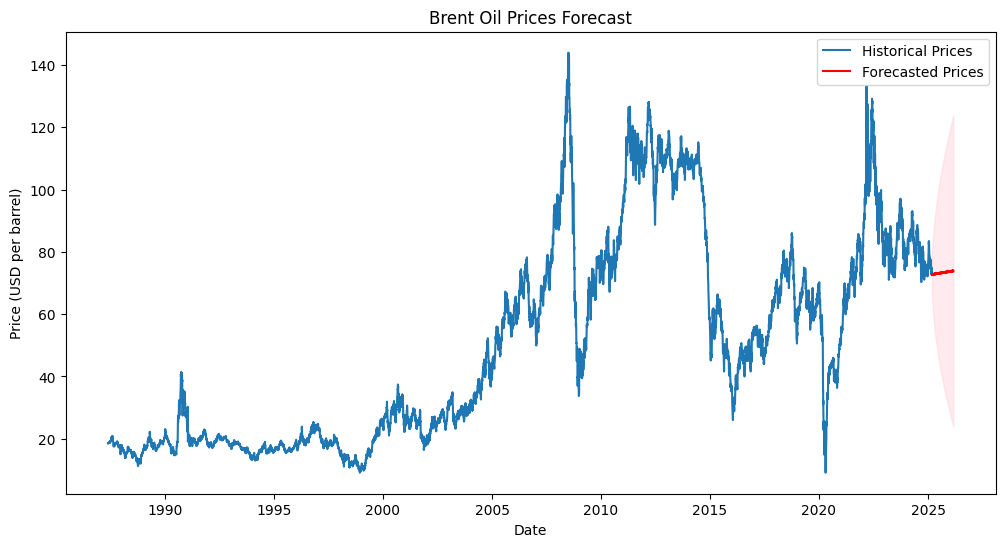

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Define the model
model = SARIMAX(prices, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future prices
forecast_length = 365  # Forecast for the next year
forecast = model_fit.get_forecast(steps=forecast_length)
forecast_prices = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], prices, label='Historical Prices')
future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=forecast_length, freq='D')
plt.plot(future_dates, forecast_prices, label='Forecasted Prices', color='r')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Brent Oil Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()


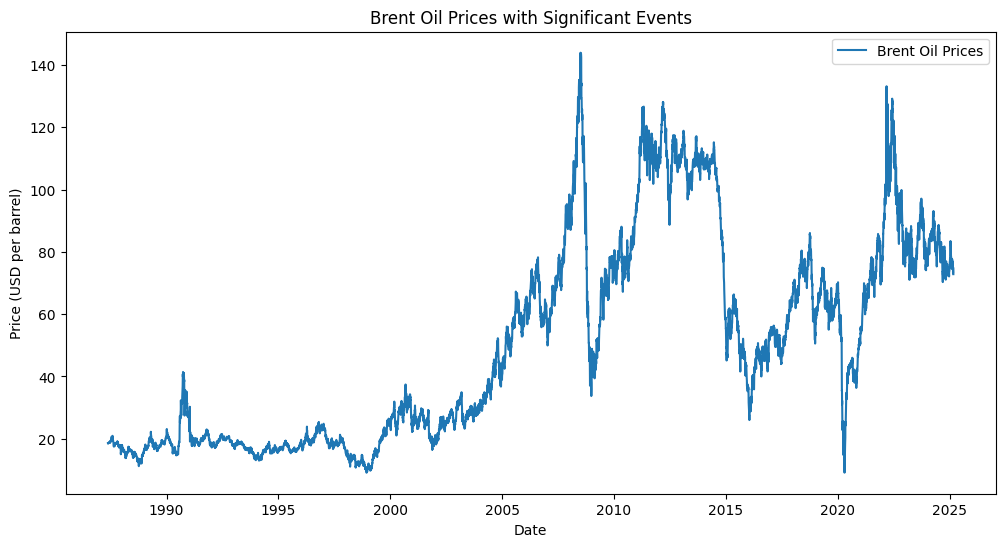

In [10]:
# List of significant events (dummy data)
events = [
    {"date": "2014-06-01", "event": "OPEC decision to maintain production levels"},
    {"date": "2016-01-01", "event": "Sanctions on Iran lifted"},
    {"date": "2018-12-01", "event": "US-China trade tensions"},
    
]

# Plot prices with event markers
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], prices, label='Brent Oil Prices')

for event in events:
    event_date = pd.to_datetime(event['date'])
    if event_date in df['Date'].values:
        price_on_event_date = df.loc[df['Date'] == event_date, 'Price'].values[0]
        plt.axvline(event_date, color='r', linestyle='--')
        plt.text(event_date, price_on_event_date + 5, event['event'], rotation=90, verticalalignment='center')

plt.title('Brent Oil Prices with Significant Events')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()
